In [ ]:
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


df=sns.load_dataset('iris')
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
x=df.drop(columns=['species'])
y=df['species']


x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


le=LabelEncoder()
y_train=le.fit_transform(y_train)
y_test=le.transform(y_test)


gmm=GaussianMixture(n_components=3,covariance_type='full')


gmm.fit(x_train)


responsibilities=gmm.predict_proba(x_train)
converged=gmm.converged_



Expectation Step (responsibilities for each data point):
 [[1.00000000e+00 2.25712422e-59 3.86085939e-42]
 [1.00000000e+00 2.84303143e-78 2.32463881e-56]
 [2.03051720e-73 3.13588771e-07 9.99999686e-01]
 [1.00000000e+00 7.91345190e-47 6.12987351e-33]
 [1.00000000e+00 1.70180701e-44 2.36477749e-30]]
Maximization Step (Updated means of the GMM):
 [[4.99       3.4525     1.45       0.245     ]
 [6.50442412 2.95387167 5.48252847 1.97542369]
 [5.90948294 2.77139193 4.19647176 1.30290704]]
Maximization Step (Updated covariances of the GMM):
 [[[0.123901   0.105275   0.0185     0.0092    ]
  [0.105275   0.15249475 0.013375   0.0078875 ]
  [0.0185     0.013375   0.033001   0.0065    ]
  [0.0092     0.0078875  0.0065     0.010976  ]]

 [[0.40752933 0.09616681 0.30471924 0.05577923]
  [0.09616681 0.10031673 0.09133076 0.06186522]
  [0.30471924 0.09133076 0.29164873 0.06204497]
  [0.05577923 0.06186522 0.06204497 0.08714193]]

 [[0.3000585  0.10734511 0.19581201 0.06018752]
  [0.10734511 0.1015841

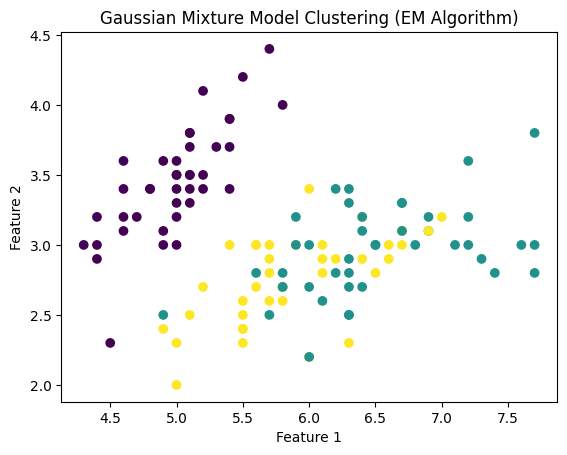

In [ ]:
print("Expectation Step (responsibilities for each data point):\n", responsibilities[:5])  # Show first 5 points
print("Maximization Step (Updated means of the GMM):\n", gmm.means_)
print("Maximization Step (Updated covariances of the GMM):\n", gmm.covariances_)
print("Convergence status: ", converged)


plt.scatter(x_train.iloc[:, 0], x_train.iloc[:, 1], c=gmm.predict(x_train), cmap='viridis')
plt.title("Gaussian Mixture Model Clustering (EM Algorithm)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
